Image Filtering - Part I
- Illustrate image smoothing and blurring
- Apply gaussian filter for image denoising
- Examine image gradient
- Understand the concepts of histograms
- Examine histogram equalization and adaptive histogram equalization

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io


In [2]:
cv2.__version__

'4.10.0'

In [3]:
print(type(cv2))

<class 'module'>


In [4]:
! pwd

/Users/aasibipin/cosc-32001-computer-vision/basics


In [21]:
image_path = 'images/blue.png'


## What is a method?

In [22]:
# KISS (Keep It Simple, Stupid)

# Function that belongs to a class 

class FileReader:
    """
    This is a doc string
    """

    def __init__(self, file_path):
        self.file_path = None
        self.image = None
        self.image_rgb = None

    def read_image(self):
        self.image = cv2.imread(image_path)
        # Need to convert the BGR to RGB
        # Uses BGR because of cameras  https://stackoverflow.com/a/33787594 
        self.image_rgb = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)

    def show_image(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

    # This is an optimization which you may do when you have large images.
    # That does not use up as much memory.
    # def show_rgb_image(self):
    #     plt.figure(figsize=(8, 6))
    #     plt.imshow(self.image_rgb)
    #     plt.axis('off')
    #     plt.show()

    # def show_og_image(self):
    #     plt.figure(figsize=(8, 6))
    #     plt.imshow(self.image)
    #     plt.axis('off')
    #     plt.show()


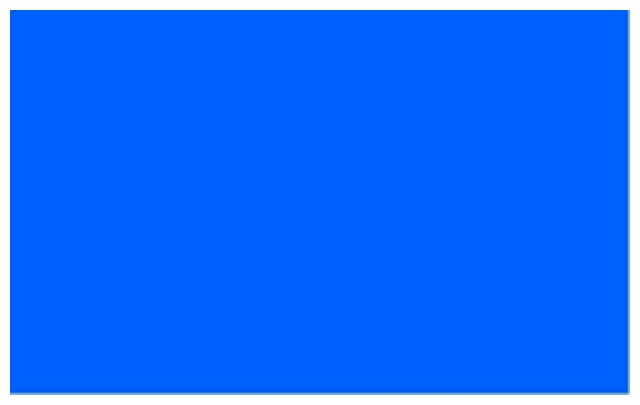

In [23]:
fr = FileReader(image_path) 
fr.read_image()
fr.show_image(fr.image_rgb)

The bottom most row = `fr.image_rgb[:,-1]`

The top most row = `fr.image_rgb[:,0]`


The left most column = `fr.image_rgb[0,:]`

The top most row = `fr.image_rgb[-1,:]`


Access a pixel `fr.image_rgb[2,0]`




## Dunder Methods

In [24]:
image_path + '21'

'images/blue.png21'

In [25]:
image_path.__add__('21')

'images/blue.png21'

In [26]:
image_path == '21'

False

In [27]:
image_path.__eq__('21')

False

One pixel contains RGB values:  [  0  96 255]


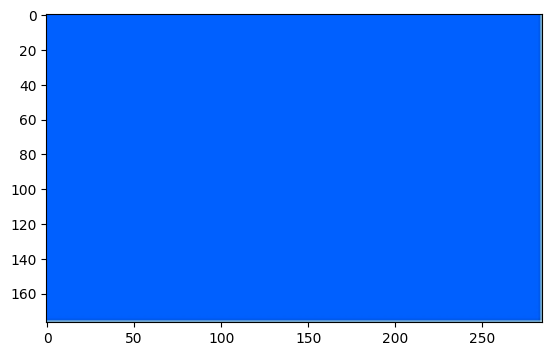

In [28]:
# Uses a RGB Mapping


img = io.imread(image_path)

im_ax = plt.imshow(img)

print('One pixel contains RGB values: ', img[0][0])

## **SCALING** an image

1. **Rescaling**:
   - Adjusts the image size by a scale factor (e.g., 1/4), either with or without anti-aliasing.
   - Proportional scaling keeps the aspect ratio consistent.
2. **Resizing**:
   - Changes the image to a fixed size (e.g., 200x200 pixels), potentially altering its aspect ratio.
3. **Downscaling**:
   - Reduces the resolution of the image using local means, which is memory efficient and avoids artifacts.



In [29]:
import matplotlib.pyplot as plt
from skimage import io, color  
from skimage.transform import rescale, resize, downscale_local_mean  
from skimage.util import img_as_ubyte 


- The image `Osteosarcoma_01.tif` is read in grayscale mode (`as_gray=True`), meaning pixel values will be between 0 and 1.
- The image is displayed in its original format and again using a grayscale colormap (`cmap='gray'`).


In [32]:
gray_img = io.imread("images/Osteosarcoma_01.tif", as_gray=True)
gray_img.shape

(1104, 1376)

In [33]:
# Remember this uses RGB
color_img = io.imread("images/Osteosarcoma_01.tif")
color_img.shape

(1104, 1376, 3)

In [34]:
l = [
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
]    
# Index for all values in a 2D list
l[:][:]


[[1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4],
 [1, 2, 3, 4, 4]]

In [35]:
l[0][0]

1

In [36]:

l = [
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
    [1,2,3,4,4],
]   

l_n = np.array(l)
# Index for all values in a 2D np array
l_n[:,:]

array([[1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4],
       [1, 2, 3, 4, 4]])

In [37]:
l_n[0,0]

np.int64(1)

In [38]:
l_n[0][0]

np.int64(1)

For an 8-bit image (most common), pixel intensity values range from 0 to 255.

Use 256 bins, one for each possible intensity value.


(16-bit images: Intensities range from 0 to 65,535. Use 65,536 bins for precise histograms)

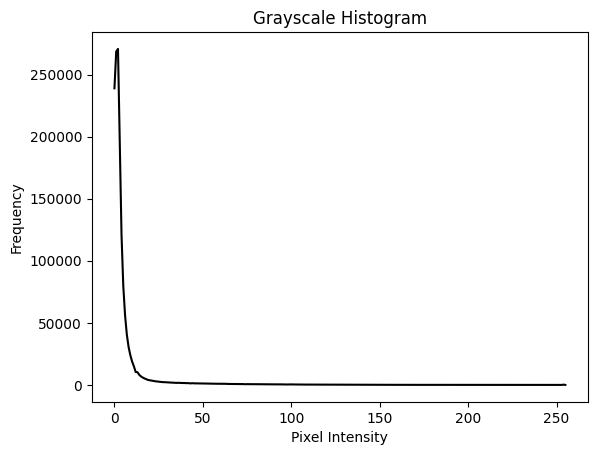

In [39]:
# Extract only Red (RGB) - 0th index, for all rows and columns
red_img = color_img[:,:,0]

bins = 256

# returns histrogram of "red image"
histogram, bin_edges = np.histogram(red_img, bins=bins, range=(0, bins))
# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[:-1], histogram, color='black')  # bin_edges[:-1] matches bin centers with histogram values
plt.show()


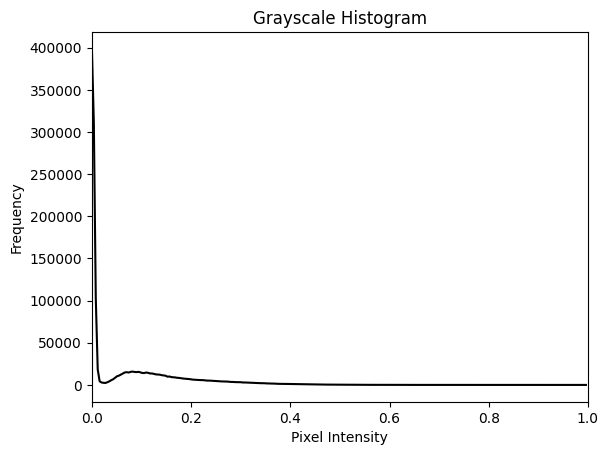

In [40]:
# Histogram of our grey-scale image
# Calculate histogram using numpy
histogram, bin_edges = np.histogram(gray_img, bins=256, range=(0, 1))

# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[:-1], histogram, color='black')  # bin_edges[:-1] matches bin centers with histogram values
plt.xlim([0, 1])
plt.show()


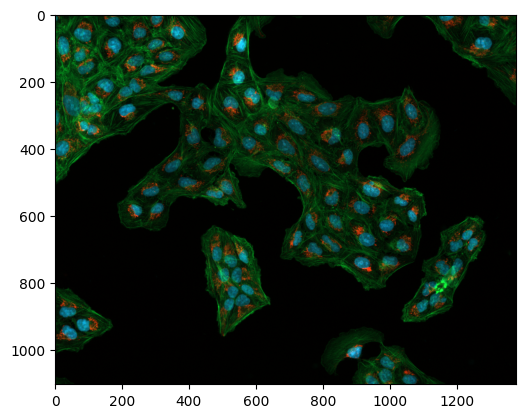

In [41]:

img = io.imread("images/Osteosarcoma_01.tif")
plt.imshow(img)
plt.imshow(img)


In [42]:
! pWD

/Users/aasibipin/cosc-32001-computer-vision/week 2


### **3. Rescaling with and without Anti-Aliasing**
#### Rescaling Without Anti-Aliasing:

In [43]:
rescale?

Signature:
rescale(
    image,
    scale,
    order=None,
    mode='reflect',
    cval=0,
    clip=True,
    preserve_range=False,
    anti_aliasing=None,
    anti_aliasing_sigma=None,
    *,
    channel_axis=None,
)
Docstring:
Scale image by a certain factor.

Performs interpolation to up-scale or down-scale N-dimensional images.
Note that anti-aliasing should be enabled when down-sizing images to avoid
aliasing artifacts. For down-sampling with an integer factor also see
`skimage.transform.downscale_local_mean`.

Parameters
----------
image : (M, N[, ...][, C]) ndarray
    Input image.
scale : {float, tuple of floats}
    Scale factors for spatial dimensions. Separate scale factors can be defined as
    (m, n[, ...]).

Returns
-------
scaled : ndarray
    Scaled version of the input.

Other parameters
----------------
order : int, optional
    The order of the spline interpolation, default is 0 if
    image.dtype is bool and 1 otherwise. The order has to be in
    the range 0-5. See 

The `rescale` function from the **scikit-image** library uses **interpolation** to up-scale or down-scale images. The specific interpolation technique depends on the **`order`** parameter. Here's an explanation of how it works:

---

### **Key Parameter: `order`**
The `order` parameter specifies the interpolation method used during scaling:

| **Order** | **Interpolation Method** | **Details**                                                                                              |
|-----------|---------------------------|----------------------------------------------------------------------------------------------------------|
| `0`       | Nearest-Neighbor          | Selects the value of the nearest pixel. Fast but results in blocky artifacts (jagged edges).             |
| `1`       | Bilinear                  | Computes the value of a new pixel as a weighted average of the four nearest pixels. Produces smoother results. |
| `2`       | Bi-quadratic              | Uses quadratic polynomials for interpolation. Smoother than bilinear but slower.                         |
| `3`       | Bi-cubic                  | Computes the weighted average of 16 nearest pixels using cubic polynomials. Very smooth but computationally intensive. |
| `4+`      | Higher-Order Splines      | Uses increasingly complex splines for interpolation. Not commonly needed and computationally expensive.  |

By default, **`order=1` (bilinear interpolation)** is used.

---

### **How It Works**
1. **Upscaling**:
   - New pixels are added between existing pixels, and their values are computed using the chosen interpolation method.
   - For example, bilinear interpolation averages the values of the surrounding pixels, resulting in smooth transitions.

2. **Downscaling**:
   - Pixels are combined into larger regions, and the values are interpolated to create the new, smaller image.
   - **Anti-Aliasing**: When downscaling, the `anti_aliasing` parameter applies a Gaussian filter to smooth out the image before interpolation, reducing artifacts (like jagged edges or aliasing).

---

### **Other Parameters**
- **`mode`**:
  - Determines how the image boundaries are handled during interpolation.
  - Common modes:
    - `'reflect'`: Reflects pixel values at the boundary.
    - `'constant'`: Pads the image with a constant value (specified by `cval`).
- **`preserve_range`**:
  - Ensures that the output values remain within the range of the input image (e.g., 0–255 for uint8 images).

---

### **Real-World Applications**
- **Upscaling**: Enlarging images for high-resolution displays or feature extraction.
- **Downscaling**: Reducing image size for storage, faster processing, or compatibility with machine learning models.


New pixel values are computed using interpolation:
Nearest Neighbor: Assigns the value of the nearest pixel from the original image to the new pixel. (Simple, but can lead to jagged edges.)
Bilinear: Averages the values of the 4 nearest pixels.
Bicubic: Uses 16 nearest pixels for smoother results.
Anti-aliasing: Applies a smoothing filter before downscaling to reduce artifacts.


Original 2x2 image:
```
[[10, 20],
 [30, 40]]
```



4x4 output using nearest-neighbor:
```
[[10, 10, 20, 20],
 [10, 10, 20, 20],
 [30, 30, 40, 40],
 [30, 30, 40, 40]]
```



4x4 output using bilinear interpolation:
```
[[10, 15, 20, 20],
 [20, 25, 30, 30],
 [30, 35, 40, 40],
 [30, 35, 40, 40]]
```



4x4 output using bi-quadratic interpolation (approximation):
```
[[10, 13, 18, 20],
 [20, 23, 28, 30],
 [30, 33, 38, 40],
 [30, 33, 38, 40]]
```

Original 4x4 image:
```
[[10, 20, 30, 40],
 [50, 60, 70, 80],
 [90, 100, 110, 120],
 [130, 140, 150, 160]]
```



2x2 output using nearest-neighbor:
```
[[10, 30],
 [90, 110]]
```



2x2 output using bilinear interpolation:
```
[[35, 55],
 [95, 115]]
```



2x2 output using bi-quadratic interpolation (approximation):
```
[[37, 53],
 [93, 113]]
```

### Application of **Nyquist sampling theorem**

To correctly represent high-frequency signals (e.g., sharp edges), the sampling rate (image resolution) **must be at least twice the highest frequency in the data.**

When downscaling, this condition is often violated, causing high-frequency details to be misrepresented in the lower resolution

**Upscaling** doesn’t inherently violate the Nyquist theorem (since new pixels are being added, not removed

### Smoothing High Frequencies:

- Anti-aliasing uses a low-pass filter (like a Gaussian blur) to smooth out high-frequency details (sharp edges and textures) before resizing the image.


- This prevents high-frequency details from being incorrectly mapped to lower frequencies, which causes visual artifacts.


In [49]:
img = io.imread("images/Osteosarcoma_01.tif")

In [50]:
import pandas as pd

In [51]:
red = pd.DataFrame(img_rescaled_with_aliasing[:,:,0])

In [52]:
img.max()

np.uint8(255)

Text(0.5, 1.0, 'without aliasing\n(with anti-aliasing) aka blurring')

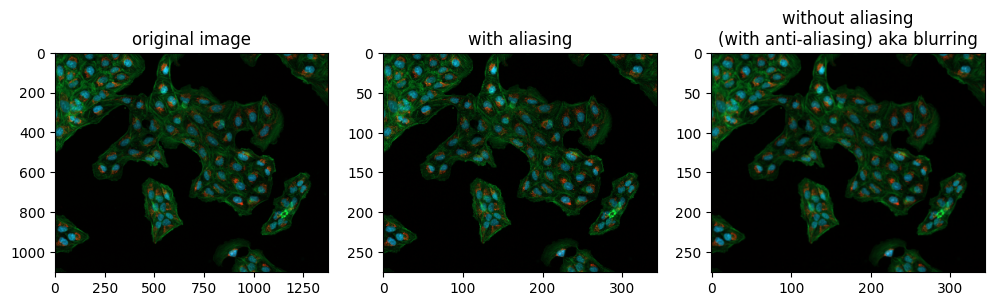

In [53]:
# Lets round decimal to u-int 8 like savages.

# when you apply rescaling note: that it will minmax to 0 to 1
img_rescaled_with_aliasing = rescale(
    img, 1.0 / 4.0, anti_aliasing=False, channel_axis = 2, preserve_range=True
).astype('uint8')

img_rescaled_without_aliasing = rescale(
    img, 1.0 / 4.0, anti_aliasing=True, channel_axis = 2, preserve_range=True
).astype('uint8')


fig, axes = plt.subplots(1,3, figsize=(12,8))
axes[0].imshow(img)
axes[1].imshow(img_rescaled_with_aliasing)
axes[2].imshow(img_rescaled_without_aliasing)
axes[0].set_title('original image')
axes[1].set_title('with aliasing')
axes[2].set_title('without aliasing\n(with anti-aliasing) aka blurring')


### Week 4 Homework

- Can you improve this code
- Can you plot 1 color across 3 images in one ax

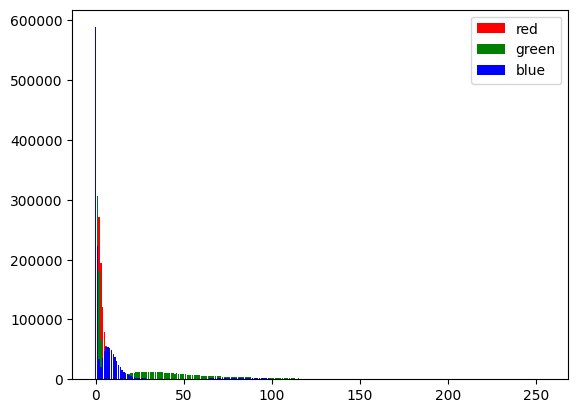

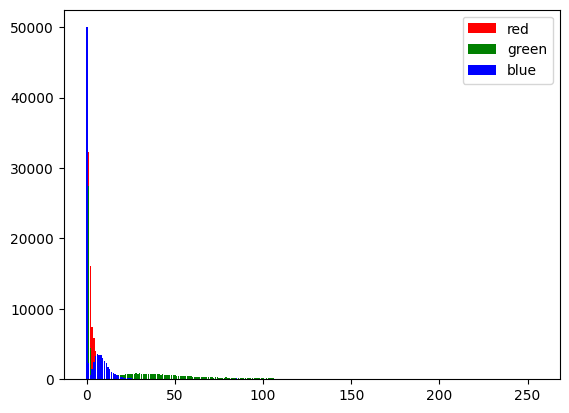

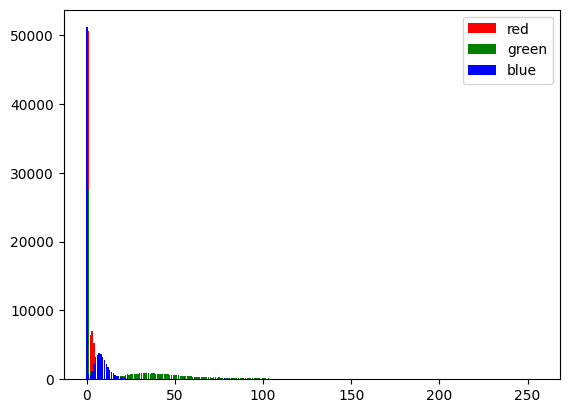

In [54]:
# Lets see if the histogram for these images are noramlly distributed

imgs = [img, img_rescaled_with_aliasing, img_rescaled_without_aliasing]
bins = 256

for img in imgs:
    fig, ax = plt.subplots()
    
    i = img[:,:,0]
    histogram, bin_edges = np.histogram(i,bins=bins,range=(0,bins))    
    ax.bar(bin_edges[:-1], histogram, color='red',label='red')
    
    i = img[:,:,1]
    histogram, bin_edges = np.histogram(i,bins=bins,range=(0,bins))
    ax.bar(bin_edges[:-1], histogram, color='green',label='green' )

    i = img[:,:,2]
    histogram, bin_edges = np.histogram(i,bins=bins,range=(0,bins))
    ax.bar(bin_edges[:-1], histogram, color='blue', label='blue')

    ax.legend()
    

#### Rescaling With Anti-Aliasing:
Most aliasing we see in downsampling digital images occur in edges
Anti-aliasing essentially gaussian blur of an image (so the edges are smoother)

In [56]:
img.shape

(276, 344, 3)

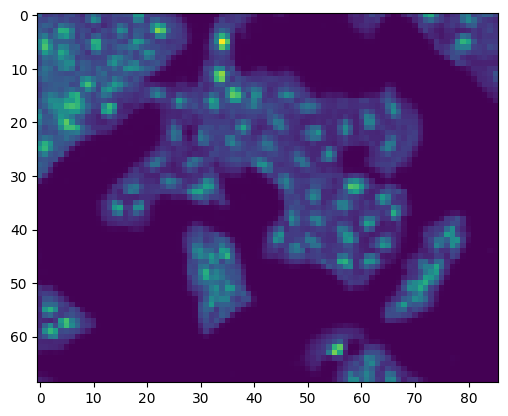

In [57]:
img_rescaled_with_aa = rescale(img, 1.0 / 4.0, anti_aliasing=True)
plt.imshow(img_rescaled_with_aa)

### **4. Resizing to Fixed Dimensions**

- The image is resized to exactly 200x200 pixels (not proportionally scaled).
- Anti-aliasing is used to maintain image quality during resizing.
- The result may look compressed or stretched depending on the aspect ratio of the original image.


In [58]:
img.shape

(276, 344, 3)

In [59]:
img_resized = resize(img, (200, 200))

img_resized.shape

(200, 200, 3)

In [60]:
cv2.imshow('Loaded Image', img)

cv2.destroyAllWindows()


Text(0.5, 1.0, 'scaled')

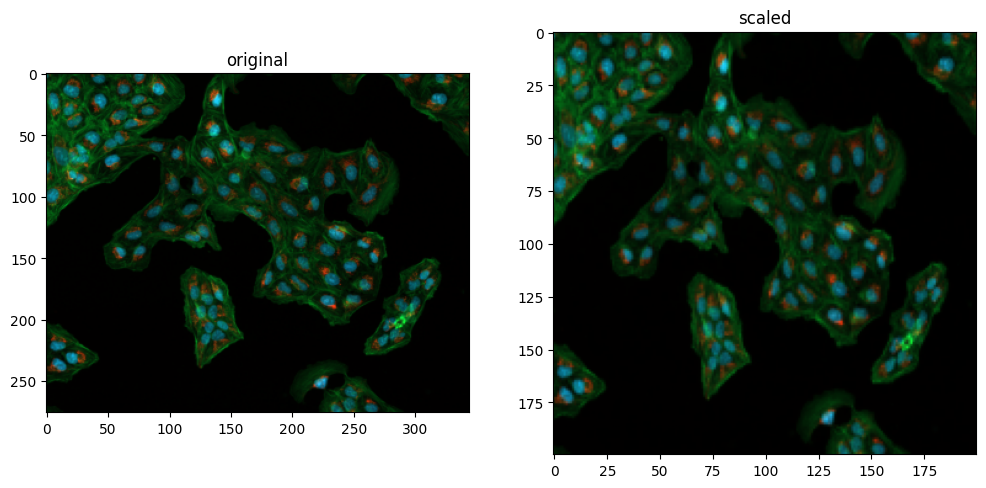

In [61]:
# Showcasing cv vs im
# imshow expects RGB(A) data, or 2D scalar 
fig, axes = plt.subplots(1,2, figsize=(12,8))
# Replacing the use of `plt.imshow` with the ax
axes[0].imshow(img)
axes[1].imshow(img_resized)
axes[0].set_title('original')
axes[1].set_title('scaled')


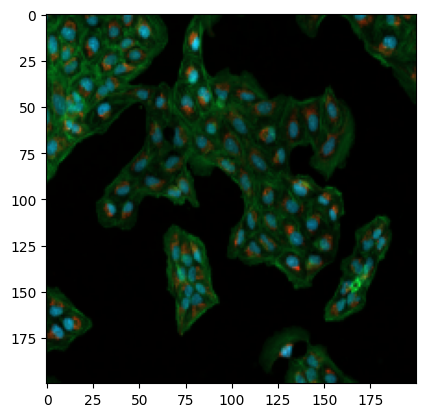

In [62]:
plt.imshow(img_resized)

### **5. Downscaling Using Local Means**

In [63]:
img.shape

(276, 344, 3)

In [64]:
[i/2 for i in (1104, 1376) ]

[552.0, 688.0]

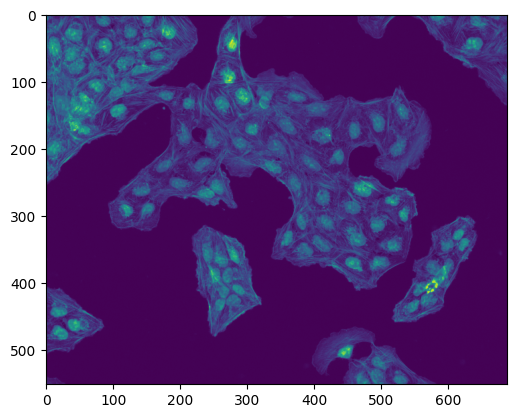

In [65]:
# only works with 2D images
img = io.imread("images/Osteosarcoma_01.tif", as_gray=True)

# Does not work with 3d images. (only 2D)
img_downscaled = downscale_local_mean(img,  (2, 2))
plt.imshow(img_downscaled)
# - The image is **downscaled using the local mean** of each 4x3 block of pixels.
# - Each block of pixels in the original image is replaced with its average value, reducing the resolution while preserving the overall structure.


https://www.imatest.com/docs/nyquist-aliasing/

https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem


In [95]:
io.imread?

Signature: io.imread(fname, as_gray=False, plugin=<DEPRECATED>, **plugin_args)
Docstring:
Load an image from file.

Parameters
----------
fname : str or pathlib.Path
    Image file name, e.g. ``test.jpg`` or URL.
as_gray : bool, optional
    If True, convert color images to gray-scale (64-bit floats).
    Images that are already in gray-scale format are not converted.

Other Parameters
----------------
plugin_args : DEPRECATED
    The plugin infrastructure is deprecated.

Returns
-------
img_array : ndarray
    The different color bands/channels are stored in the
    third dimension, such that a gray-image is MxN, an
    RGB-image MxNx3 and an RGBA-image MxNx4.
File:      ~/cosc-32001-computer-vision/.venv/lib/python3.10/site-packages/skimage/io/_io.py
Type:      function

In [66]:
# Color code RGB 
io_img = io.imread("images/Osteosarcoma_01.tif")


In [67]:
# Although you can get away with this, it can confuse the reader to think the image is 2D.
io_img[0,0,]

array([ 7, 69, 61], dtype=uint8)

In [68]:
# This is more explicit which python perfers
io_img[0,0,:]

array([ 7, 69, 61], dtype=uint8)

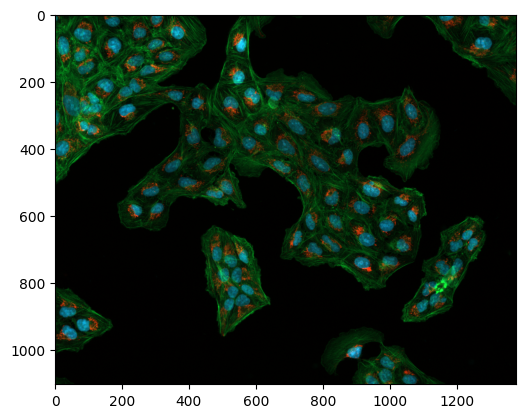

In [70]:
# In order to show a grey image set cmap
plt.imshow(io_img, cmap='gray')

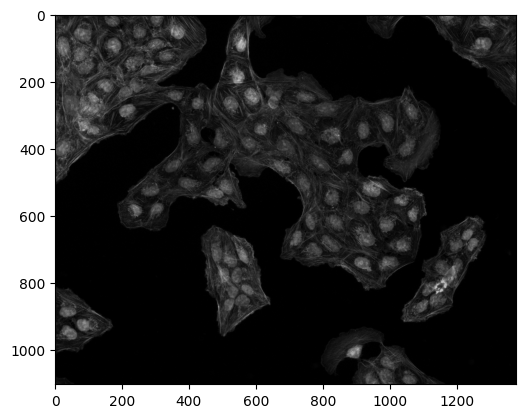

In [72]:
# In order to show a grey image set cmap
plt.imshow(gray_img, cmap='gray')

TO STUDY:
- 2D Convolution 
- Gaussian Filters/Kernal 
- Frequency Domain
- Fourier Transform
- Low Pass filters in images (mean) 
- Median Filters in images



RGB vs HSV, which is more memory efficient? 


When working with imaging codecs (color spaces like **RGB**, **HSV**, and **CIELAB**), each has unique trade-offs in terms of **speed**, **processing overhead**, and **use cases**. Here's a breakdown:

---

### **1. Speed: How Fast Are RGB, HSV, and CIELAB?**
The speed depends on the **computational complexity of the color space conversion** and the number of components used in processing.

#### **RGB**
- **Fastest**: RGB is the native format for most image data and requires no transformation when loaded (e.g., from files like `.jpg`, `.png`).
- **Why fast?**:
  - It directly represents pixel intensities for red, green, and blue channels.
  - Operations like filtering or arithmetic (e.g., blending) are fast since no conversion is needed.
- **Limitations**:
  - Not perceptually uniform (small changes in intensity may not correlate with human perception).
  - Poor for tasks requiring color manipulation or segmentation.

#### **HSV (Hue, Saturation, Value)**
- **Moderate Speed**: HSV requires converting RGB into a cylindrical representation of colors. The conversion involves trigonometric functions, which make it slower than RGB.
- **Why slower?**:
  - Computing **Hue** involves comparing channel values and performing calculations with atan2 (arctangent) for angles.
  - HSV Conversion: Takes ~2–3× longer for large images (e.g., 1080p or 4K).
- **Strengths**:
  - Excellent for color segmentation and manipulation.
  - Hue is independent of intensity, which is useful for isolating colors.
  - Applications: Object tracking, skin detection, color-based filtering.

#### **CIELAB (L\*a\*b\*)**
- **Slowest**: Conversion to CIELAB involves converting RGB to a linearized XYZ color space first, then applying perceptually uniform transformations.
- **Why slow?**:
  - Requires a gamma correction and a more computationally expensive conversion (power functions and conditions for each component).
  - CIELAB is perceptually uniform, meaning equal distances in the color space correspond to equal perceptual differences.
- **Strengths**:
  - Ideal for comparing colors or when perceptual differences matter.
  - Used in applications like image quality evaluation and printing where color precision is critical.

---

### **2. Use Cases: When to Use Each Codec**

| **Color Space** | **Speed** | **Use Case** | **Advantages** | **Disadvantages** |
|------------------|-----------|--------------|----------------|--------------------|
| **RGB**          | Fastest   | Basic image operations, visual rendering | Simple, native for most devices | Non-uniform, not good for segmentation |
| **HSV**          | Moderate  | Color segmentation, object tracking | Decouples color (Hue) from brightness (Value) | Slower conversions, less intuitive |
| **CIELAB**       | Slowest   | Color comparison, perceptual tasks | Perceptually uniform, great for precision | Slow, computationally heavy |

---


### **4. Questions to Ask**
1. Why might HSV be better than RGB for tasks like skin detection or tracking a specific object by color?
2. How does the perceptual uniformity of CIELAB benefit image quality assessment?
3. Can you think of a situation where computational speed (e.g., using RGB) outweighs the need for perceptual accuracy?



The HSV color space (Hue, Saturation, Value) is ideal when tasks involve color manipulation, segmentation, or detection because it decouples the chromatic (color) information from the intensity (brightness). Here are common use cases where HSV shines:




When Is CIELAB Worth the Cost?
CIELAB is ideal when perceptual uniformity is essential. Some use cases:

Color comparison: The Euclidean distance in CIELAB reflects perceptual color differences accurately.
Image quality assessment: Used to calculate metrics like ΔE (perceptual color difference).
Printing and color correction: Ensures colors appear consistent under different lighting.




In [87]:
io_img.shape

(1104, 1376, 3)

In [88]:
blurred_img = cv2.GaussianBlur(io_img, (5, 5), 0)  # Apply Gaussian blur

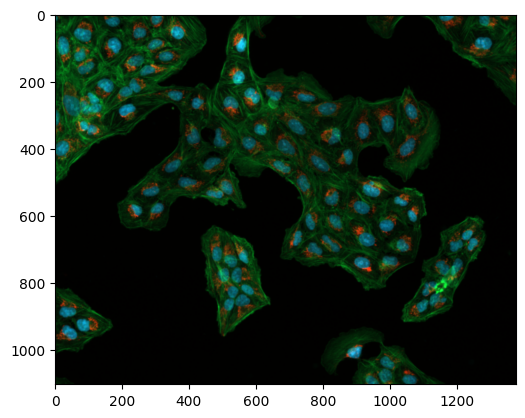

In [98]:
# plt.imshow expects RGB.
plt.imshow(blurred_img)


Original dtype: float64, Range: (0.0, 0.9991666666666668)
Converted dtype: uint8, Range: (0, 254)


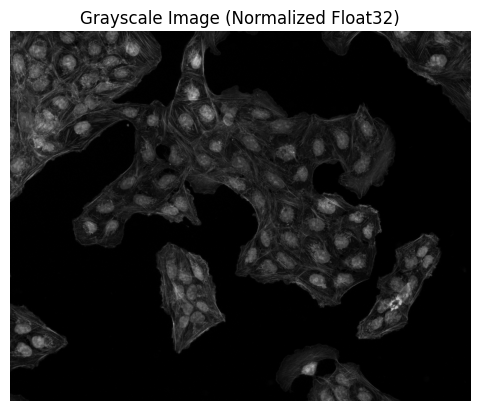

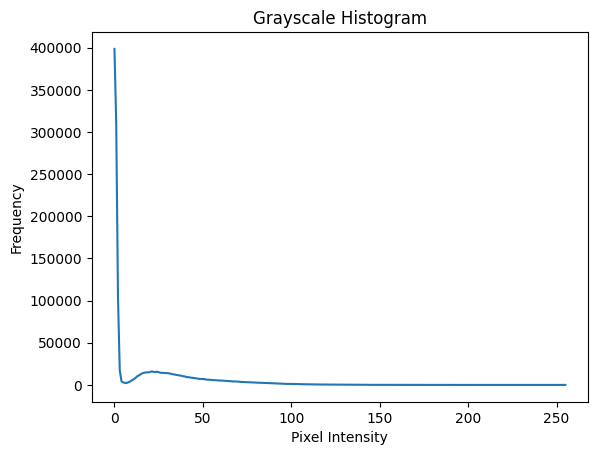

In [84]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image as a float64 grayscale image (default behavior of skimage)
img = io.imread("../images/Osteosarcoma_01.tif", as_gray=True)

# Check the data type and range
print(f"Original dtype: {img.dtype}, Range: ({img.min()}, {img.max()})")



# Convert to uint8
img_uint8 = (img * 255).astype(np.uint8)
print(f"Converted dtype: {img_uint8.dtype}, Range: ({img_uint8.min()}, {img_uint8.max()})")

# Plot the normalized grayscale image
plt.imshow(img_uint8, cmap='gray')
plt.title("Grayscale Image (Normalized Float32)")
plt.axis("off")
plt.show()

# Calculate histogram
hist = cv2.calcHist([img_uint8], [0], None, [256], [0, 256])

# Plot histogram
plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


Image dtype: float32, Range: (0.0, 1.0)


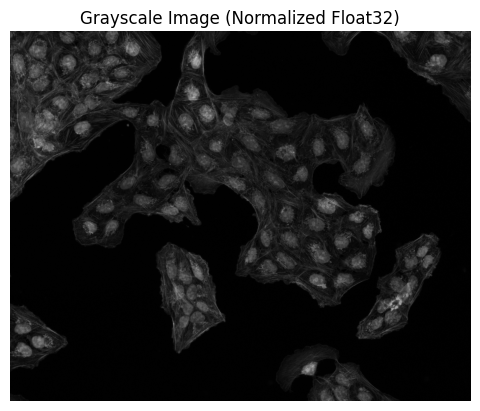

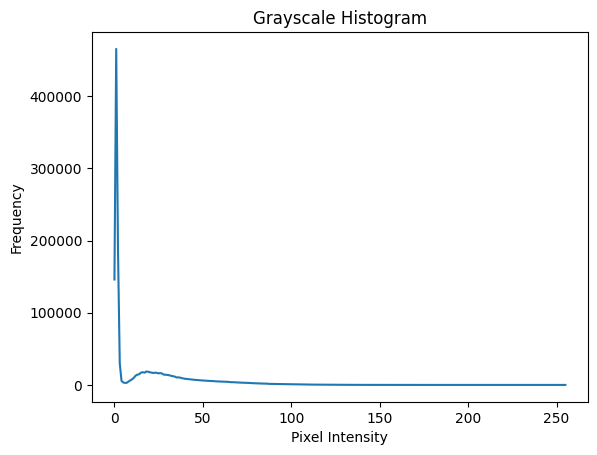

In [86]:
# Read the image as grayscale and convert to float32
img = cv2.imread("../images/Osteosarcoma_01.tif", cv2.IMREAD_GRAYSCALE).astype('float32') / 255.0

print(f"Image dtype: {img.dtype}, Range: ({img.min()}, {img.max()})")

# Plot the normalized grayscale image
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image (Normalized Float32)")
plt.axis("off")
plt.show()

# hist = cv2.calcHist([img], [0], None, [256], [0, 256])
# Adjust the range and bins for normalized values
hist = cv2.calcHist([img], [0], None, [256], [0, 1])

# Plot histogram
plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



1. **Histogram Binning Matters**:
   - For **uint8**, bins `[0, 256]` perfectly align with pixel intensities `[0, 255]`.
   - For **float32 normalized**, bins `[0, 256]` are inappropriate; use `[0, 1]`.

2. **Scaling Changes Distribution**:
   - The manual scaling in the `skimage` approach ensures compatibility with default OpenCV settings.
   - The OpenCV normalized image requires adjusting the histogram range for meaningful results.

3. **Practical Advice**:
   - Use `[0, 1]` for normalized images when calculating histograms.
   - Always ensure that the bin range matches the pixel intensity range of your image.
